# IMPORTS

In [13]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers

# Data Loading and preprocessing

In [2]:
IMAGE_SIZE=256
CHANNELS=3
data_generator=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    validation_split=0.25

)
train_data=data_generator.flow_from_directory(
    directory='PlantVillage',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_data=data_generator.flow_from_directory(
    directory='PlantVillage',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)



Found 1614 images belonging to 3 classes.
Found 538 images belonging to 3 classes.


# Model

In [4]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
    
])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [8]:
callbacks_list = [checkpoint]

# Training and results

In [9]:
history=model.fit(
    train_data,
    batch_size=32,
    epochs=30,
    verbose=1,
    callbacks=callbacks_list,
    validation_data=(validation_data)
)

Epoch 1/30
51/51 [==============================] - 58s 1s/step - loss: 0.7864 - accuracy: 0.6283 - val_loss: 0.4893 - val_accuracy: 0.8104
Epoch 2/30
51/51 [==============================] - 45s 881ms/step - loss: 0.4125 - accuracy: 0.8377 - val_loss: 0.4029 - val_accuracy: 0.8401
Epoch 3/30
51/51 [==============================] - 45s 880ms/step - loss: 0.2939 - accuracy: 0.8885 - val_loss: 0.2279 - val_accuracy: 0.9126
Epoch 4/30
51/51 [==============================] - 46s 900ms/step - loss: 0.2485 - accuracy: 0.9033 - val_loss: 0.2045 - val_accuracy: 0.9349
Epoch 5/30
51/51 [==============================] - 48s 948ms/step - loss: 0.1641 - accuracy: 0.9331 - val_loss: 0.1445 - val_accuracy: 0.9517
Epoch 6/30
51/51 [==============================] - 50s 977ms/step - loss: 0.1651 - accuracy: 0.9343 - val_loss: 0.3480 - val_accuracy: 0.8625
Epoch 7/30
51/51 [==============================] - 50s 983ms/step - loss: 0.1862 - accuracy: 0.9263 - val_loss: 0.1456 - val_accuracy: 0.9368
Ep

51/51 [==============================] - 50s 979ms/step - loss: 0.0839 - accuracy: 0.9734 - val_loss: 0.1198 - val_accuracy: 0.9628
Epoch 29/30
51/51 [==============================] - 50s 989ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.0732 - val_accuracy: 0.9721
Epoch 30/30
51/51 [==============================] - 50s 979ms/step - loss: 0.1094 - accuracy: 0.9554 - val_loss: 0.1212 - val_accuracy: 0.9554


In [10]:
model.save('cnn_model.h5')

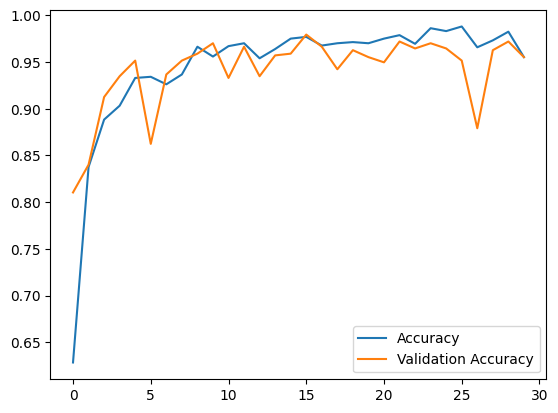

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Validation Accuracy'])

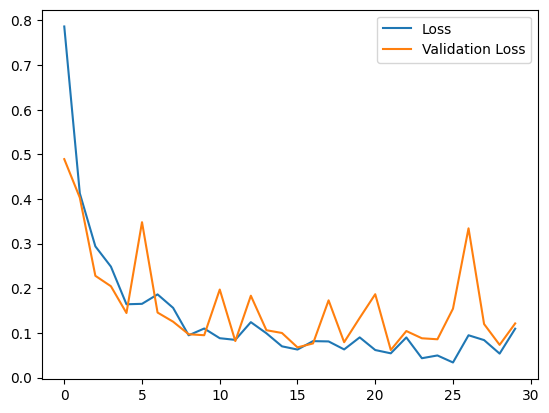

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss','Validation Loss'])